### Fase 6. Reporte de resultados.

#### 0. Preparación de los datos

1. Importamos las librerías.

In [3]:
#Tratamiento de datos
import pandas as pd
import numpy as np
# -----------------------------------------------------------------------

#Pruebas estadísticas
from scipy.stats import shapiro, kstest

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
sns.set_style('whitegrid') #establece el estilo del fondo de las gráficas como 'whitegrid'.
sns.set_theme(style='dark') #cambia el esquema de colores predeterminado de Seaborn a uno más oscuro. 
plt.style.use('fast') #cambia el estilo de gráfico.
# --------------------------------------------------------

#Configuaración para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

In [4]:
#Traemos el csv que hemos pulido en la fase 2
url_data='https://raw.githubusercontent.com/s-armeni/proyecto-da-promo-H-modulo-3-team-3-DataMinds/main/hr_data_final.csv'
df_data=pd.read_csv(url_data, index_col=0)
df_data.head(1)

,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Employee_number,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work
0,51,No,Unknown,684.0,6.0,3,Unknown,1.0,162,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.0,3,0,11.32,5,3.0,20,15,15,1972,Yes


En la fase 4, para el ejercicio de A/B Testing creamos una nueva columna que calcula la media de esos tres tipos de satisfacción, pudiendo medir así el grado de satisfacción general de los trabajadores. Vamos a recuperar ese csv para conocer la distribución de las bajas según el grado de satisfacción.

In [5]:
#Traemos los datos del csv que preparamos en la fase 4, con las medias de satisfacción
url_satisfaction='https://raw.githubusercontent.com/s-armeni/proyecto-da-promo-H-modulo-3-team-3-DataMinds/main/ab_testing.csv'
df_satisfaction=pd.read_csv(url_satisfaction)
df_satisfaction.head(1)

,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Employee_number,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work,Employee_satisfaction,Group_test
0,51,No,Unknown,684.0,6.0,3,Unknown,1.0,162,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.0,3,0,11.32,5,3.0,20,15,15,1972,Yes,2.33,B


In [6]:
#Unimos ambos csv para añadir la columna Employee_satisfaction para el reporte de resultados
#Reindexamos df_satisfaction con Employee_number para asegurarnos de que los índices coincidan
df_satisfaction = df_satisfaction.set_index('Employee_number')
df_data = df_data.set_index('Employee_number')

#Concatenamos la columna Employee_satisfaction de df_satisfaction al final de df_data
df_data['Employee_satisfaction'] = df_satisfaction['Employee_satisfaction']

#Reseteamos el índice si es necesario
df_report = df_data.reset_index()
df_report.head(1)

,Employee_number,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work,Employee_satisfaction
0,162,51,No,Unknown,684.0,6.0,3,Unknown,1.0,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.0,3,0,11.32,5,3.0,20,15,15,1972,Yes,2.33


Visualizamos la información general del df_report (no realizamos un EDA porque ya lo hemos hecho en las fases anteriores).

In [7]:
#Visualiamos la información general
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_number             1614 non-null   object 
 1   Age                         1614 non-null   int64  
 2   Attrition                   1614 non-null   object 
 3   Business_travel             1614 non-null   object 
 4   Daily_rate                  1614 non-null   float64
 5   Distance_from_home          1614 non-null   float64
 6   Education                   1614 non-null   int64  
 7   Education_field             1614 non-null   object 
 8   Employee_count              1614 non-null   float64
 9   Environment_satisfaction    1614 non-null   int64  
 10  Gender                      1614 non-null   object 
 11  Hourly_rate                 1614 non-null   float64
 12  Job_involvement             1614 non-null   int64  
 13  Job_level                   1614 

---

#### 1. Análisis de la relación entre características individuales y la tasa de rotación.

🔍 1.1 Distribución de la tasa de abandono de empleados.

No Attrition: 84.0%
Yes Attrition: 16.0%


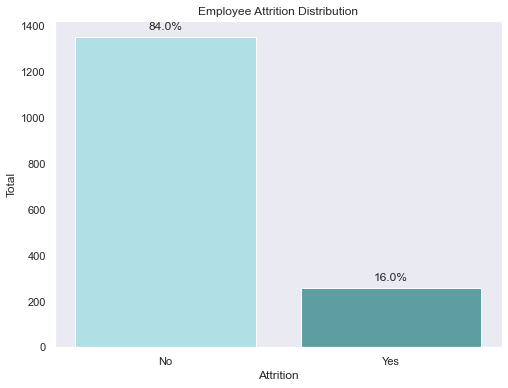

In [8]:
#Calculamos los porcentajes
#Cantidad total de empleados, cantidad de No Attrition y cantidad de Yes Attrition, y qué % representan
total_employees=len(df_report)
no_attrition=len(df_report[df_report['Attrition'] == 'No'])
yes_attrition=len(df_report[df_report['Attrition'] == 'Yes'])

no_attrition_percent=(no_attrition / total_employees) * 100
yes_attrition_percent=(yes_attrition / total_employees) * 100

#Imprimimos los resultados
print(f"No Attrition: {no_attrition_percent:.1f}%")
print(f"Yes Attrition: {yes_attrition_percent:.1f}%")

#Creamos del gráfico
attrition_counts = df_report['Attrition'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(attrition_counts.index, attrition_counts.values, color=['powderblue', 'cadetblue'])
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Total')

#Colocamos el % en la gráfica
for i, count in enumerate(attrition_counts.values):
    plt.text(i, count + 20, f'{(count / total_employees) * 100:.1f}%', ha='center', va='bottom')

Observaciones:

- La gran mayoría de los empleados no han dejado la empresa, alrededor del 84%.

- Una menor proporción de empleados sí han dejado la empresa, alrededor del 16%.

Conclusiones:

- **Baja tasa de abandono:** la empresa presenta una baja tasa de deserción, con un número significativamente mayor de empleados que permanecen en la empresa en comparación con aquellos que la han dejado.

- **Retención de empleados:** la alta cantidad de empleados que siguen en la empresa sugiere que ésta puede tener estrategias de retención de empleados efectivas, o un ambiente laboral favorable que fomenta la permanencia de los empleados.

🔍 1.2. ¿Existe una relación entre la distancia desde el hogar (Distance_from_home) y las bajas de empleados?

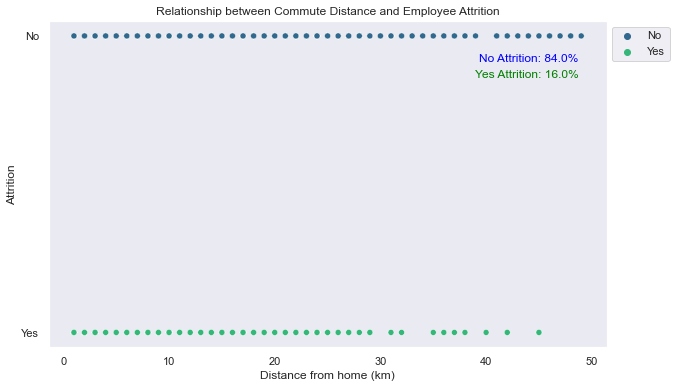

In [9]:
#Calculamos de los porcentajes de abandono
total_employees = len(df_report)
no_attrition = len(df_report[df_report['Attrition'] == 'No'])
yes_attrition = len(df_report[df_report['Attrition'] == 'Yes'])

no_attrition_percent = (no_attrition / total_employees) * 100
yes_attrition_percent = (yes_attrition / total_employees) * 100

#Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_report, x='Distance_from_home', y='Attrition', hue='Attrition', palette='viridis')
plt.title('Relationship between Commute Distance and Employee Attrition')
plt.xlabel('Distance from home (km)')
plt.ylabel('Attrition')

#Movemos la leyenda hacia arriba
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#Añadimos los % como anotación en la parte superior derecha del gráfico
plt.annotate(f'No Attrition: {no_attrition_percent:.1f}%', xy=(0.95, 0.90), xycoords='axes fraction', ha='right', va='top', fontsize=12, color='blue')
plt.annotate(f'Yes Attrition: {yes_attrition_percent:.1f}%', xy=(0.95, 0.85), xycoords='axes fraction', ha='right', va='top', fontsize=12, color='green');


Observaciones:
- No se aprecia una correlación clara entre la distancia al trabajo y las bajas en la empresa. Los valores están disperos a lo largo del gráfico, lo cual indica que no hay un patrón constante.

Conclusiones:

- Las bajas se esparcen a lo largo de todas las distancias del trabajo a casa, lo que **sugiere que hay otros factores también influyen en la marcha de empleados.**

🔍 ¿Cuál es la distribución de los empleados que trabajan en remoto vs los que no, y su relación con la deserción?

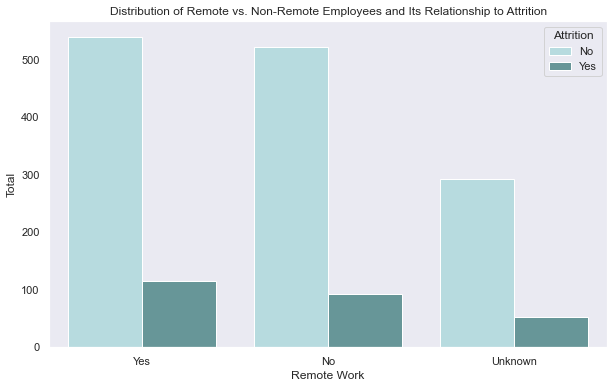

In [10]:
#Creamos el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df_report, x='Remote_work', hue='Attrition', palette={'No': 'powderblue', 'Yes': 'cadetblue'})
plt.title('Distribution of Remote vs. Non-Remote Employees and Its Relationship to Attrition')
plt.xlabel('Remote Work')
plt.ylabel('Total')
plt.legend(title='Attrition');

Observaciones:

- Aproximadamente, la cantidad de trabajadores en remoto y no en remoto es similar.

- **La gran mayoría de los empleados, tanto remotos como no remotos, no han dejado la empresa.**

- Una minoría de empleados, tanto remotos como no remotos, han dejado la empresa.

- Las columnas Unknown corresponden a los nulos que había en el conjunto de datos orginial.

Conclusiones:

- Independientemente de si trabaja en remoto o presencial, la mayoría de los empleados tiende a quedarse en la empresa.

- Existe un número considerable de 'Unknown', lo que podría indicar falta de datos o situaciones laborales especiales que no están claramente categorizadas.

🔍 Distribución de las bajas según edad (Age).

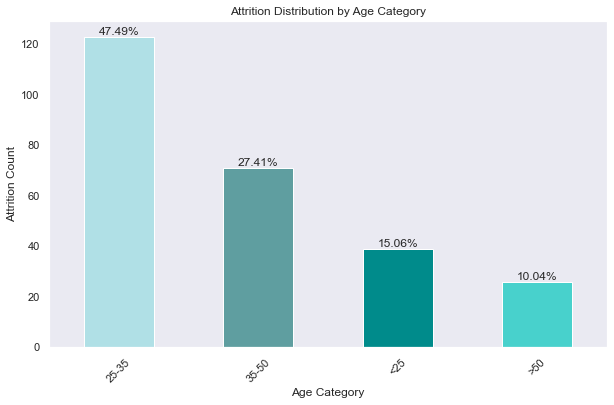

In [11]:
#Definimos las categorías de edad
bins = [0, 25, 35, 50, float('inf')]
labels = ['<25', '25-35', '35-50', '>50']

#Agrupamos los empleados por categorías de edad
df_report['Age_Category'] = pd.cut(df_report['Age'], bins=bins, labels=labels, right=False)

#Calculamos el recuento de bajas por categoría de edad
attrition_age_category_counts = df_report[df_report['Attrition'] == 'Yes']['Age_Category'].value_counts()

#Calculamos los porcentajes de bajas por categoría de edad
attrition_age_category_percentages = (attrition_age_category_counts / attrition_age_category_counts.sum()) * 100

#Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
attrition_age_category_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, value in enumerate(attrition_age_category_counts):
    plt.text(i, value, f"{attrition_age_category_percentages[i]:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- Grupo de edad con mayor % de bajas: hay un claro desmarque para el grupo de empleados de entre 25 y 35 años, que acumulan una tasa de abandono del 47%.

- Grupo de edad con mayor % de retención: en el extremo opuesto están los mayores de 50, con un porcentaje de bajas de apenas el 10%.

Conclusiones:
- Hay una clara relación entre la edad y el abandono, siendo los grupos de entre 25 y 50 años los que suman casi el 75% de las bajas. Esto podría deberse a factores como la conciliación familiar y laboral, estancamiento profesional o insatisfacción con la cultura de la compañía.

- Se podría decir que **la edad es un factor clave en la retención de empleados** y que es necesaria una estrategia de retención de empleados específica para revertir esa tendencia.


🔍 Distribución de las bajas por nivel educativo (Education).

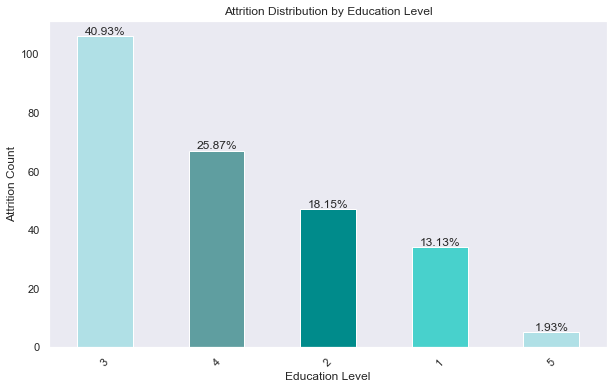

In [12]:
#Calculamos el recuento de bajas por nivel de educación
attrition_education_counts = df_report[df_report['Attrition'] == 'Yes']['Education'].value_counts()

#Calculamos los porcentajes de bajas por nivel de educación
attrition_education_percentages = (attrition_education_counts / attrition_education_counts.sum()) * 100

#Cremoas un gráfico de barras
plt.figure(figsize=(10, 6))
attrition_education_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, (education_level, count) in enumerate(attrition_education_counts.items()):
    percentage = attrition_education_percentages[education_level]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- Nivel educativo con más bajas: el nivel 3, con más del 40% de bajas.

- Nivel educativo con menos bajas: el nivel 5, con menos del 2%.

Conclusiones:
- Los empleados con niveles medianos (2, 3 y 4) son los que más tienden a irse. Mientras con los extremos (1 y 5) cuentan con una mayor retención.

- Aquellos con el nivel educativo más alto son los que menos bajas causan.

- Se puede deducir, entonces, que **el nivel educativo es un factor importante en la rotación de trabajadores**, por lo que se podrían considerar estrategias de retención específicas para los niveles 2, 3 y 4.


🔍 Distribución de empleados por Gender.

In [13]:
#Calculamos primero la cantidad de hombres y mujeres hay en la empresa y qué % representantan. Y lo mismo para las bajas.

#Calculamos el total de empleados
total_employees = len(df_report)

#Calculamos el total de hombres y mujeres
total_male_employees = df_report[df_report['Gender'] == 'Male'].shape[0]
total_female_employees = df_report[df_report['Gender'] == 'Female'].shape[0]

#Calculamos el total de bajas
total_attrition = len(df_report[df_report['Attrition'] == 'Yes'])

#Calculamos el total de bajas para hombres y mujeres
attrition_male_employees = len(df_report[(df_report['Attrition'] == 'Yes') & (df_report['Gender'] == 'Male')])
attrition_female_employees = len(df_report[(df_report['Attrition'] == 'Yes') & (df_report['Gender'] == 'Female')])

#Calculamos los porcentajes redondeados a 2 decimales
percentage_male_employees = round((total_male_employees / total_employees) * 100, 2)
percentage_female_employees = round((total_female_employees / total_employees) * 100, 2)
percentage_attrition_male = round((attrition_male_employees / total_attrition) * 100, 2)
percentage_attrition_female = round((attrition_female_employees / total_attrition) * 100, 2)

#Imprimimos resultados
print("Total Employees:", total_employees)
print("Total Male Employees:", total_male_employees)
print("Percentage of Male Employees:", percentage_male_employees)
print("Total Female Employees:", total_female_employees)
print("Percentage of Female Employees:", percentage_female_employees)
print('----------------------')
print("Total Attrition:", total_attrition)
print("Attrition - Male Employees:", attrition_male_employees)
print("Attrition - Female Employees:", attrition_female_employees)
print("Percentage of Attrition - Male Employees:", percentage_attrition_male)
print("Percentage of Attrition - Female Employees:", percentage_attrition_female)

Total Employees: 1614
Total Male Employees: 971
Percentage of Male Employees: 60.16
Total Female Employees: 643
Percentage of Female Employees: 39.84
----------------------
Total Attrition: 259
Attrition - Male Employees: 163
Attrition - Female Employees: 96
Percentage of Attrition - Male Employees: 62.93
Percentage of Attrition - Female Employees: 37.07


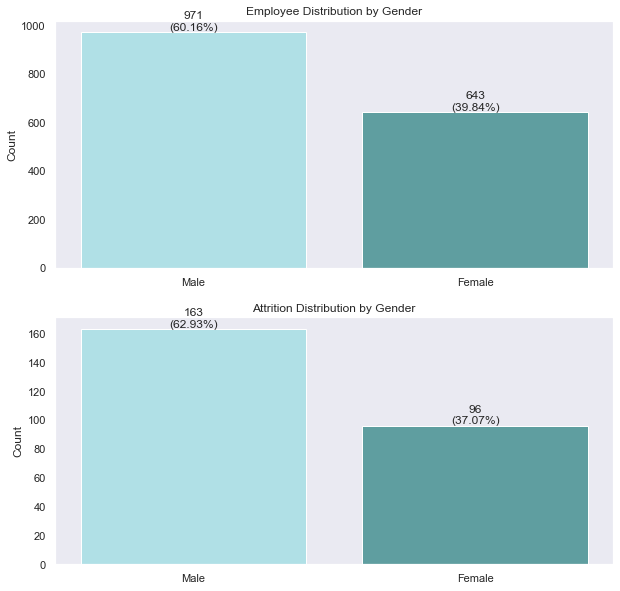

In [14]:
#Ahora hacemos los gráficos en base a las variables anteriores

#Calculamos porcentajes redondeados a 2 decimales
percentage_male_employees = round((total_male_employees / total_employees) * 100, 2)
percentage_female_employees = round((total_female_employees / total_employees) * 100, 2)
percentage_attrition_male = round((attrition_male_employees / total_attrition) * 100, 2)
percentage_attrition_female = round((attrition_female_employees / total_attrition) * 100, 2)

#Configuramos los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

#Gráfico 1: Distribución de empleados por género
ax1.bar(['Male', 'Female'], [total_male_employees, total_female_employees], color=['powderblue', 'cadetblue'])
ax1.set_title('Employee Distribution by Gender')
ax1.set_ylabel('Count')

#Anotamos los valores y porcentajes en el gráfico 1
for i, value in enumerate([total_male_employees, total_female_employees]):
    ax1.text(i, value, f"{value}\n({percentage_male_employees if i == 0 else percentage_female_employees}%)", ha='center', va='bottom')

#Gráfico 2: Distribución de bajas por género
ax2.bar(['Male', 'Female'], [attrition_male_employees, attrition_female_employees], color=['powderblue', 'cadetblue'])
ax2.set_title('Attrition Distribution by Gender')
ax2.set_ylabel('Count')

#Anotamos los valores y porcentajes en el gráfico 2
for i, value in enumerate([attrition_male_employees, attrition_female_employees]):
    ax2.text(i, value, f"{value}\n({percentage_attrition_male if i == 0 else percentage_attrition_female}%)", ha='center', va='bottom')

Observaciones:
- Distribución desigual: hay una **clara desproporción entre hombres y mujeres** trabajadores en la empresa, siendo ellos un 60% y ellas un 40%, aproximadamente.

- Una proporción similar siguen las bajas, siendo superior en los hombres que en las mujeres.

Conclusiones:

- Sería oportuno considerar implementar alguna estrategia de inclusión y paridad de género.

🔍 Distribución de las bajas según categoría laboral (Job_level).

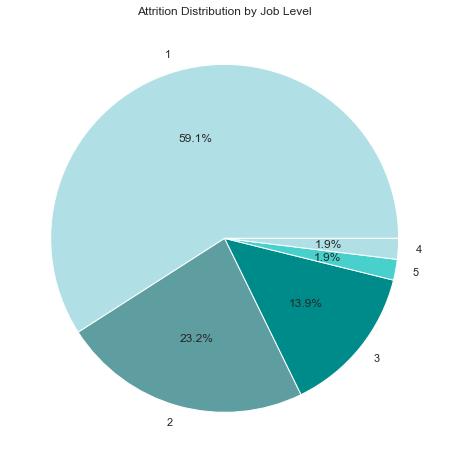

In [15]:
#Calculamos el recuento de bajas por nivel de trabajo
attrition_job_level_counts = df_report[df_report['Attrition'] == 'Yes']['Job_level'].value_counts()

#Calculamos los porcentajes de bajas por nivel de trabajo
attrition_job_level_percentages = (attrition_job_level_counts / attrition_job_level_counts.sum()) * 100

#Creamos un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(attrition_job_level_counts, labels=attrition_job_level_counts.index, autopct='%1.1f%%', colors=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Job Level');

Observaciones:

- El nivel con mayor proporción de bajas es el nivel 1, que concentra más de la mitad de las bajas.

- Los niveles con mayor retención son los niveles 4 y 5.


Conclusiones:

- Hay una **clara relación entre la categoría laboral y la retención laboral**: a menor nivel mayor número de bajas.

- En el extremo opuesto se encuentran los nivels 4 y 5, con menos de un 2% de bajas cada uno, lo que indica que las acciones que esté tomando la empresa para mantener a estos perfiles está funcionando.

🔍 Relación de las bajas de las horas extras (Over_time).

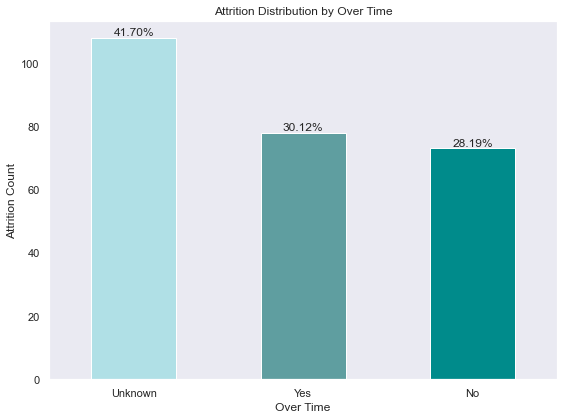

In [16]:
# Calcular la cantidad de empleados que se fueron según la columna Over_time
attrition_over_time_counts = df_report[df_report['Attrition'] == 'Yes']['Over_time'].value_counts()

# Calcular los porcentajes de empleados que se fueron según la columna Over_time
attrition_over_time_percentages = (attrition_over_time_counts / attrition_over_time_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
attrition_over_time_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan'])
plt.title('Attrition Distribution by Over Time')
plt.xlabel('Over Time')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (over_time, count) in enumerate(attrition_over_time_counts.items()):
    percentage = attrition_over_time_percentages[over_time]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Observaciones:

- Inicialmente podríamos observar que las bajas están niveladas entre los trabajadores que hacen horas extras y los que no. No obstante, el número de Unknown (nulos en el conjunto de datos original) es demasiado alto para poder sacar alguna conclusión de esta métrica.

🔍 Distribución de las bajas según el porcentaje de aumento de sueldo (Percent_salary_hike).

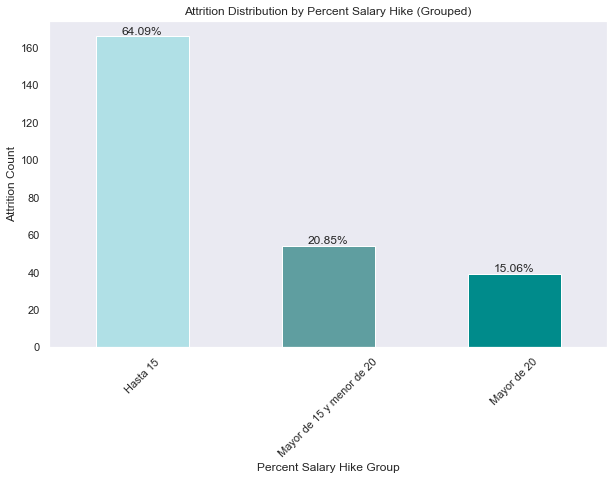

In [17]:
#Agrupamos los valores de Percent_salary_hike
def group_salary_hike(percent):
    if percent <= 15:
        return 'Hasta 15'
    elif percent > 15 and percent < 20:
        return 'Mayor de 15 y menor de 20'
    else:
        return 'Mayor de 20'

#Aplicamos la función de agrupación
df_report['Percent_salary_hike_grouped'] = df_report['Percent_salary_hike'].apply(group_salary_hike)

#Calculamos la cantidad de empleados que se han ido según el Percent_salary_hike agrupado
attrition_percent_salary_hike_grouped_counts = df_report[df_report['Attrition'] == 'Yes']['Percent_salary_hike_grouped'].value_counts()

#Calculamos los porcentajes de empleados que se han ido según el Percent_salary_hike agrupado
attrition_percent_salary_hike_grouped_percentages = (attrition_percent_salary_hike_grouped_counts / attrition_percent_salary_hike_grouped_counts.sum()) * 100

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_percent_salary_hike_grouped_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan'])
plt.title('Attrition Distribution by Percent Salary Hike (Grouped)')
plt.xlabel('Percent Salary Hike Group')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, (percent_salary_hike_group, count) in enumerate(attrition_percent_salary_hike_grouped_counts.items()):
    percentage = attrition_percent_salary_hike_grouped_percentages[percent_salary_hike_group]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- Grupo con más bajas: aquellos empleados que reciben un **aumento salarial del 15% o menos son los que más abandonan la empresa, triplicando al siguiente grupo**.

- Por otro lado, el grupo que más retención tiene es el de aquellos trabajadores que reciben aumentos superiores al 20%.

Conclusiones:
- Se puede concluir en que el porcentaje de aumennto salarial es un factor importante en la valoración del empleado a la hora de continuar en la empresa.

- Se podrían considerar estrategias de compensación competitiva para mantener a ese grupo con mayor probabilidad de abandono.

🔍 Distribución de las bajas según la valoración del desempeño (Performance_rating).

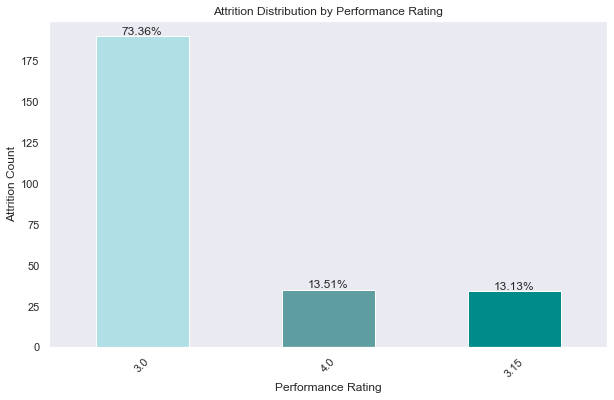

In [18]:
#Calculamos el recuento de bajas por nivel de performance
attrition_performance_counts = df_report[df_report['Attrition'] == 'Yes']['Performance_rating'].value_counts()

#Calculamos los porcentajes de bajas por nivel de performance
attrition_performance_percentages = (attrition_performance_counts / attrition_performance_counts.sum()) * 100

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_performance_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan'])
plt.title('Attrition Distribution by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition Count')

#anotamos los porcentajes en el gráfico
for i, (performance_rating, count) in enumerate(attrition_performance_counts.items()):
    percentage = attrition_performance_percentages[performance_rating]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- Se observan dos grupos claramente distinguidos, aquellos con una **performance de 3, que representan un 73% de las bajas**, y aquellos con una performance de 4, siendo menos del 12% de las bajas.

- El grupo con una valoración de 3.15 corresponde a aquellos trabajadores que no tenían puntuación y se hizo una estimación con la media (nulos en el conjunto de datos original).

Conclusiones: 

- Hay una clara relación entre una baja valoración y el índice de bajas. Es posible que ese bajo rendimiento se deba a un descontento producido por varios factores, por ejemplo, la conciliación laboral o la remuneración.

- Sería positivo realizar un análisis más preciso para identificar esas correlaciones y poder ajustar una estrategia para mantener a ese grupo de trabajadores más contento y, por tanto, más productivo.

🔍 Distribución de las bajas según la cantidad de acciones formativas recibidas en el último año (Training_times_last_year).

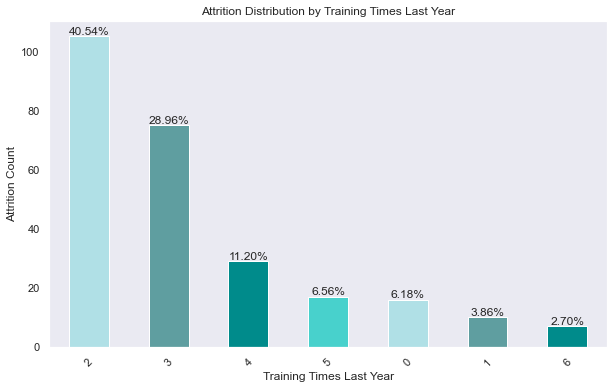

In [19]:
#Calculamos el recuento de bajas por nivel de entrenamiento
attrition_training_counts = df_report[df_report['Attrition'] == 'Yes']['Training_times_last_year'].value_counts()

#Calculamos los porcentajes de bajas por nivel de entrenamiento
attrition_training_percentages = (attrition_training_counts / attrition_training_counts.sum()) * 100

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_training_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Training Times Last Year')
plt.xlabel('Training Times Last Year')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, (training_times, count) in enumerate(attrition_training_counts.items()):
    percentage = attrition_training_percentages[training_times]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- Los trabajadores que recibieron **2 o 3 formaciones son los que más bajas han causado, siendo más del 69% del total**.
- Curiosamente, aquellos con solo 0 o 1 acción formativa representan un porcentaje bajo de abandono, apenas un 10% entre ambos.

Conclusiones:
- El hecho de que los trabajadores que menos formaciones han recibido sean de los que menos dejan la empresa hace pensar que tendrán un grado alto de satisfacción general en el trabajo y se sientan compensados en otros aspectos como, por ejemplo, el salario o las condiciones laborales.

🔍 Distribución de las bajas según la conciliación de la vida laboral y personal (Work_life_balance).

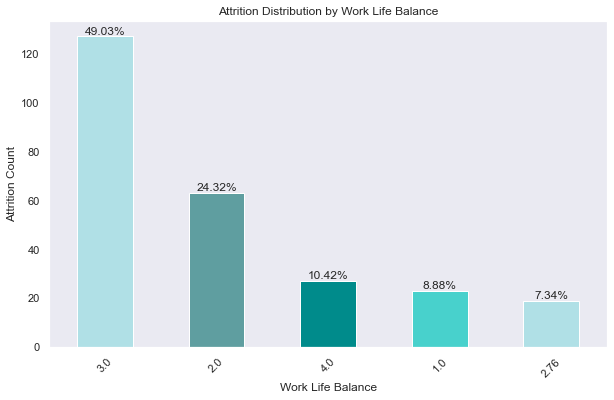

In [20]:
#Calculamos el recuento de bajas por nivel de Work_life_balance
attrition_work_life_balance_counts = df_report[df_report['Attrition'] == 'Yes']['Work_life_balance'].value_counts()

#Calculamos los porcentajes de bajas por nivel de Work_life_balance
attrition_work_life_balance_percentages = (attrition_work_life_balance_counts / attrition_work_life_balance_counts.sum()) * 100

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_work_life_balance_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, (work_life_balance, count) in enumerate(attrition_work_life_balance_counts.items()):
    percentage = attrition_work_life_balance_percentages[work_life_balance]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);
# plt.tight_layout()
# plt.show()

Observaciones:
- La **tasa de rotación es superior para los trabajadores con un equilibrio en la conciliación laboral y personal de 2 y 3, sumando entre ambos un 73%** del total de bajas y siendo concretamente los que valoraron su conciliación con un 3 los que más abandonan, con un 49% del total.

- No obstante, los trabajadores que valoraron su equilibrio con tan solo un punto no llegan al 9% de las bajas, lo que hace pensar que encuentran satisfacción en algún otro aspecto como, por ejemplo, la remuneración.

- El grupo de 2.76 son aquellos valores que eran nulos y que se cubrieron con la media.

Conclusiones:

- Sería indicado diseñar una estrategia para mejorar ese equilibrio entre la vida personal y laboral para aquellos que se encuentran en el rango del medio, quizás observando qué hace que los que tienen un equilibrio de 1 sí se queden en la empresa.

🔍 Distribución de las bajas según la antigüedad (Years_at_company).

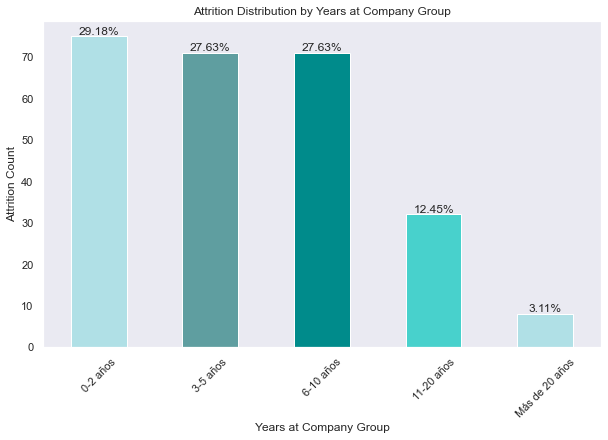

In [21]:
#Definimos los grupos de años en la compañía
bins = [0, 2, 5, 10, 20, df_data['Years_at_company'].max()]
labels = ['0-2 años', '3-5 años', '6-10 años', '11-20 años', 'Más de 20 años']

#Creamos una nueva columna en el DataFrame para los rangos de años
df_data['Years_at_company_group'] = pd.cut(df_data['Years_at_company'], bins=bins, labels=labels, right=False)

#Filtramos los datos para obtener solo los empleados que se han ido (Attrition == 'Yes')
attrition_data = df_data[df_data['Attrition'] == 'Yes']

#Calculamos el recuento de bajas por grupo de años en la compañía
attrition_years_group_counts = attrition_data['Years_at_company_group'].value_counts().sort_index()

#Calculamos los porcentajes de bajas por grupo de años en la compañía
attrition_years_group_percentages = (attrition_years_group_counts / attrition_years_group_counts.sum()) * 100

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_years_group_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Years at Company Group')
plt.xlabel('Years at Company Group')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, value in enumerate(attrition_years_group_counts):
    percentage = attrition_years_group_percentages.iloc[i]
    plt.text(i, value, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- Los empleados que llevan en la compañía **10 años o menos son los que más bajas causan, acumulando un total de casi el 85%** de los abondonos totales. Ese gran grupo se puede dividir en tres grupos más pequeños pero con un porcentaje de rotación similar, en torno a 28% cada uno.

- En el extremo opuesto están los trabajadores que llevan **más de 20 años y que apenas acumulan el 3%** de las bajas.

Conclusiones:
- Hay una clara relación entre la antigüedad y la permanencia, y un linde también muy claro: **a partir de los 10 años, la rotación baja muy considerablemente**.

- Sería interesante analizar qué hacer¡ que aquellos más veteranos opten por quedarse y, quizás, adaptar una estrategia específica para conseguir retener a los menos antiguos.

🔍 Distribución de las bajas según el tiempo transcurrido desde el último ascenso (Years_since_last_promotion).

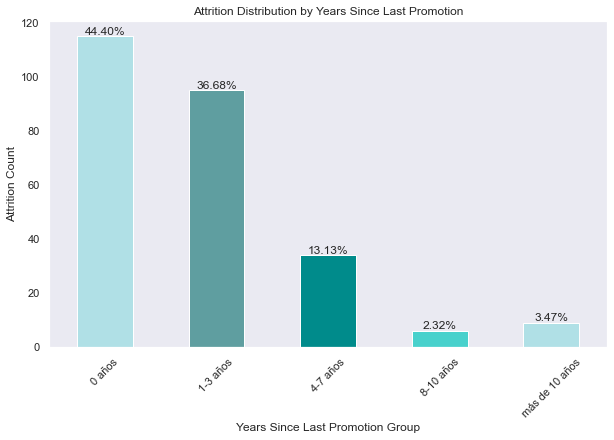

In [22]:
#Definimos las categorías de agrupación
bins = [-1, 0, 3, 7, 10, float('inf')]
labels = ['0 años', '1-3 años', '4-7 años', '8-10 años', 'más de 10 años']

#Creamos una nueva columna en el DataFrame con las categorías
df_data['Promotion_Years_Group'] = pd.cut(df_data['Years_since_last_promotion'], bins=bins, labels=labels)

#Calculamos el recuento de bajas por grupo de años desde la última promoción
attrition_promotion_counts = df_data[df_data['Attrition'] == 'Yes']['Promotion_Years_Group'].value_counts().sort_index()

#Calculamos los porcentajes de bajas por grupo de años desde la última promoción
attrition_promotion_percentages = (attrition_promotion_counts / attrition_promotion_counts.sum()) * 100

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_promotion_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion Group')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, (group, count) in enumerate(attrition_promotion_counts.items()):
    percentage = attrition_promotion_percentages[group]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- El grupo de 0 años representa a aquellos que **nunca han sido ascendidos, y suponen cerca de la mitad de las bajas, el 44%**.

- El siguiente grupo es el que tiene su último ascenso más cerca, **3 años o menos, siendo el 36%** de los abandonos.

- Para los trabajadores que tuvieron su último ascenso hace más tiempo son los que más permanencia tienen. Esto hace pensar que están muy satisfechos con su puesto actual o que sienten compensación en otros factores.

Conclusiones:

- Sería aconsejable identificar qué otros factores están influyendo en los empleados que hace 3 años o menos que recibieron un ascenso pero deciden marcharse.

- También se podría considerar alguna acción específica para aquellos que nunca recibieron un ascenso, estudiar el motivo (quizás llevan muy poco tiempo en la empresa, o quizás se pueda impartir alguna formación que les permita avanzar en su carrera laboral dentro de la empresa).

🔍 Distribución de las bajas según nivel medio de satisfacción (Employee_satisfaction).

Inicialmente existían tres columnas que miden distintos tipos de satisfacción del empleado (environment, job y relationship).

La columna Employee_satisfaction calcula el promedio de esas tres métricas para conocer la satisfacción media de cada empleado.

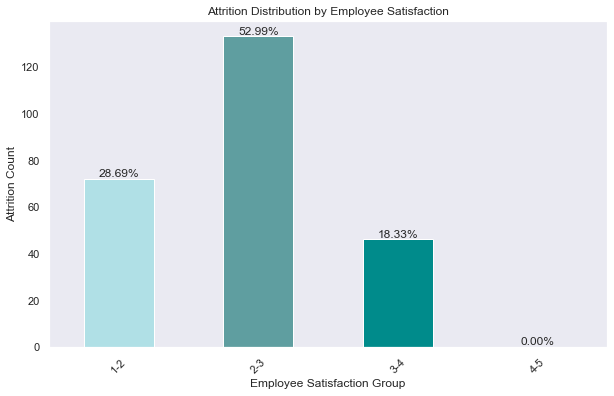

In [23]:
#Definimos las categorías de agrupación para la satisfacción del empleado
satisfaction_bins = [1, 2, 3, 4, 5]
satisfaction_labels = ['1-2', '2-3', '3-4', '4-5']

#Creamos una nueva columna en el DataFrame con las categorías de satisfacción del empleado
df_data['Employee_Satisfaction_Group'] = pd.cut(df_satisfaction['Employee_satisfaction'], bins=satisfaction_bins, labels=satisfaction_labels)

#Calculamos el recuento de bajas por grupo de satisfacción del empleado
attrition_satisfaction_counts = df_data[df_data['Attrition'] == 'Yes']['Employee_Satisfaction_Group'].value_counts().sort_index()

#Calculamos los porcentajes de bajas por grupo de satisfacción del empleado
attrition_satisfaction_percentages = (attrition_satisfaction_counts / attrition_satisfaction_counts.sum()) * 100

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_satisfaction_counts.plot(kind='bar', color=['powderblue', 'cadetblue', 'darkcyan', 'mediumturquoise'])
plt.title('Attrition Distribution by Employee Satisfaction')
plt.xlabel('Employee Satisfaction Group')
plt.ylabel('Attrition Count')

#Anotamos los porcentajes en el gráfico
for i, (group, count) in enumerate(attrition_satisfaction_counts.items()):
    percentage = attrition_satisfaction_percentages[group]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45);

Observaciones:
- Los trabajadores con un nivel de satisfacción global más alto son los más fieles, representando únicamente un 18% de las bajas.

- **El grupo que más abandonos causa es el de empleados con un nivel de satisfacción global entre 2 y 3, siendo el 53%** del total de bajas.

Conclusiones:

- Es recomendable tomar acciones que aumenten la satisfacción de los trabajadores para conseguir un mayor índice de retención.

---

#### 2. Análisis de la relación entre el conjunto de características y la tasa de rotación.

In [24]:
#Hacemos un df sólo con las columnas que nos interesan
#Primero hacemos una copia del df
df_multi=df_report.copy()
#Listamos las columnas que vamos a eliminar
columns_drop=['Employee_number', 'Business_travel', 'Daily_rate', 'Education_field', 'Employee_count', 'Hourly_rate', 'Job_role', 'Marital_status', 'Monthly_rate', 'Num_companies_worked', 'Over_18', 'Over_time', 'Stock_option_level', 'Total_working_years', 'Years_with_curr_manager', 'Date_birth', 'Age_Category', 'Percent_salary_hike_grouped']
#Eliminamos las columnas
df_multi.drop(columns=columns_drop, inplace=True)

df_multi.head(1)

,Age,Attrition,Distance_from_home,Education,Environment_satisfaction,Gender,Job_involvement,Job_level,Job_satisfaction,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Remote_work,Employee_satisfaction
0,51,No,6.0,3,1,Male,3,5,3,13.0,3.0,3,5,3.0,20,15,Yes,2.33


   Attrition  Gender  Remote_work
0          0       0            1
1          0       0            1
2          0       0            1
3          0       1            0
4          0       1            0
Age                          -0.162833
Distance_from_home            0.050089
Education                    -0.027635
Environment_satisfaction     -0.102692
Gender                       -0.024766
Job_involvement              -0.126354
Job_level                    -0.186918
Job_satisfaction             -0.099231
Percent_salary_hike          -0.027105
Performance_rating            0.011858
Relationship_satisfaction    -0.033475
Training_times_last_year     -0.044501
Work_life_balance            -0.055134
Years_at_company             -0.177018
Years_since_last_promotion   -0.042011
Remote_work                   0.009570
Employee_satisfaction        -0.127729
Name: Attrition, dtype: float64


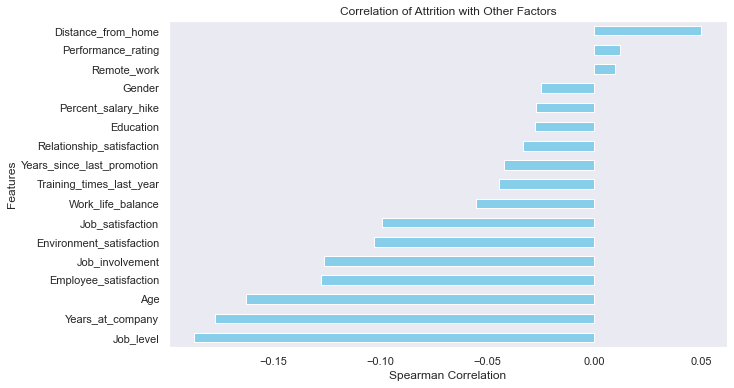

In [25]:
#Para poder comparar todas las variables, deben ser todas numéricas, así que convertimos aquellas que son object en int

#Creamos la función para convertir columnas object a int
def convert_columns_to_int(df, columns):
    mapping = {
        'Yes': 1,
        'No': 0,
        'Female': 1,
        'Male': 0,
        'Unknown': 2
    }
    for column in columns:
        if column in df.columns:
            df[column] = df[column].map(mapping)
    return df

#Listamos las columnas a convertir
columns_to_convert = ['Attrition', 'Gender', 'Remote_work']

#Convertimos las columnas
df_multi = convert_columns_to_int(df_multi, columns_to_convert)

#Verificamos la conversión
print(df_multi[columns_to_convert].head())

#Calculamos las correlaciones de Attrition con todas las demás columnas
attrition_correlations = df_multi.corr(method='spearman')['Attrition'].drop('Attrition')

#Mostramos las correlaciones
print(attrition_correlations)

#Visualizamos las correlaciones utilizando un gráfico de barras
plt.figure(figsize=(10, 6))
attrition_correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Attrition with Other Factors')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.show()

Estos resultados muestran las correlaciones de Spearman entrer la columna 'Attrition' y las demás características del conjunto de datos.

Conceptos básicos para la interpretación:

- Un valor de correlación cercano a 1 indica una correlación positiva fuerte, lo que significa que a medida que el valor de una característica aumenta es más propbale que Attrition también aumente (más bajas).

- Por el contrario, un valor de correlación cercano a -1 indica una correlación negativa fuerte, lo que significa que a medida que el valor de una característica aumenta, es menos probable que Attrition también aumente (menos bajas).

- Un valor de correlación cercano a 0 indica una correlación débil o nula.

Observaciones:

- Job_level, Years_at_company y Age tiene correlaciones negativas moderadas con Attrition. Esto significa que a medida que estos valores aumentan es menos probable que ocurra una baja.

- Las siguientes características en este orden serían Employee_satisfaction y Job_involvement, que también tienen correlaciones negativas moderadas con Attrition. Esto sugiere que a medida que estos aspectos se perdiben mejor por parte del empleado, es menos probable que abandonen la empresa.

- También con correlaciones negativas pero más débiles, están Environment_satisfaction y Job_satisfaction.

- Las demás características como la Distance_from_home o Percent_salary_hike tienen correlaciones más débiles o cercanas a ceron con Attrition.

Conclusiones:

- Los resultados sugieren que ciertas características como la edad, el nivel de trabajo, el compromiso laboral y la satisfacción del empleado están levemente asociadas con la permanencia de los trabajadores, mientras que aspectos como Remote_work o Education, aunque también tienen relación, es todavía más débil.

- No obstante, **ninguna correlación está especialmente alejada de 0, lo cual indica que, aunque existe una relación directa entre las características y el nivel de bajas, individualmente no son lo suficientemente fuertes como para tener un gran impacto**.

- Sin embargo, **si consideramos el conjunto, podemos considerar que son muchos los factores que influyen en el abandono**. Sería interesante diseñar un paquete de medidas que aumenten la satisfacción de los empleados en todos o muchos de esos factores para, así, aumentar la retención de trabajadores.

---

#### 3. Análisis de la correlación entre características.

In [26]:
# definimos la lista los nombres de las variables numéricas 
numeric = df_multi.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinations = list(combinations(numeric, 2))


In [27]:
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df_multi, combinations)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('Age', 'Attrition'), ('Age', 'Distance_from_home'), ('Age', 'Education'), ('Age', 'Environment_satisfaction'), ('Age', 'Gender'), ('Age', 'Job_involvement'), ('Age', 'Job_level'), ('Age', 'Job_satisfaction'), ('Age', 'Percent_salary_hike'), ('Age', 'Performance_rating'), ('Age', 'Relationship_satisfaction'), ('Age', 'Training_times_last_year'), ('Age', 'Work_life_balance'), ('Age', 'Years_at_company'), ('Age', 'Years_since_last_promotion'), ('Age', 'Remote_work'), ('Age', 'Employee_satisfaction'), ('Attrition', 'Distance_from_home'), ('Attrition', 'Education'), ('Attrition', 'Environment_satisfaction'), ('Attrition', 'Gender'), ('Attrition', 'Job_involvement'), ('Attrition', 'Job_level'), ('Attrition', 'Job_satisfaction'), ('Attrition', 'Percent_salary_hike'), ('Attrition', 'Performance_rating'), ('Attrition', 'Relationship_satisf

In [29]:
df_correlaciones = df_multi.corr( method = "spearman")
df_correlaciones

,Age,Attrition,Distance_from_home,Education,Environment_satisfaction,Gender,Job_involvement,Job_level,Job_satisfaction,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Remote_work,Employee_satisfaction
Age,1.000000,-0.162833,-0.018802,0.199142,0.003621,0.030485,0.041730,0.486043,-0.010174,0.013307,0.019940,0.045807,-0.011728,0.001878,0.254005,0.171217,-0.003483,0.016902
Attrition,-0.162833,1.000000,0.050089,-0.027635,-0.102692,-0.024766,-0.126354,-0.186918,-0.099231,-0.027105,0.011858,-0.033475,-0.044501,-0.055134,-0.177018,-0.042011,0.009570,-0.127729
Distance_from_home,-0.018802,0.050089,1.000000,0.005726,-0.010301,0.010230,0.028308,0.016072,0.007592,0.048240,0.046049,0.005338,-0.052078,-0.026772,-0.015424,-0.024378,-0.026445,0.000120
Education,0.199142,-0.027635,0.005726,1.000000,-0.044778,0.010613,0.036402,0.103286,-0.001681,0.008786,-0.048845,-0.019888,-0.035741,0.019187,0.064417,0.041675,0.006814,-0.042711
Environment_satisfaction,0.003621,-0.102692,-0.010301,-0.044778,1.000000,-0.003172,-0.026662,0.011737,0.028280,-0.034353,-0.004830,0.004759,-0.039352,0.060842,0.014705,0.036449,0.001063,0.589474
Gender,0.030485,-0.024766,0.010230,0.010613,-0.003172,1.000000,-0.018147,0.044101,-0.045785,-0.007938,0.019321,-0.026340,0.024566,0.018720,0.042322,0.021287,-0.021038,-0.048590
Job_involvement,0.041730,-0.126354,0.028308,0.036402,-0.026662,-0.018147,1.000000,-0.003778,-0.010614,-0.005998,-0.047070,0.038432,0.006675,-0.023213,0.021764,-0.006973,0.013073,-0.004054
Job_level,0.486043,-0.186918,0.016072,0.103286,0.011737,0.044101,-0.003778,1.000000,-0.012870,-0.037048,-0.017404,0.008850,-0.025442,0.038539,0.476567,0.255848,-0.029848,0.000221
Job_satisfaction,-0.010174,-0.099231,0.007592,-0.001681,0.028280,-0.045785,-0.010614,-0.012870,1.000000,0.032164,0.003941,-0.009525,-0.001101,-0.035764,0.010673,0.009088,0.033018,0.581517
Percent_salary_hike,0.013307,-0.027105,0.048240,0.008786,-0.034353,-0.007938,-0.005998,-0.037048,0.032164,1.000000,0.496849,-0.034276,-0.006180,0.012425,-0.051566,-0.050944,-0.030620,-0.020638


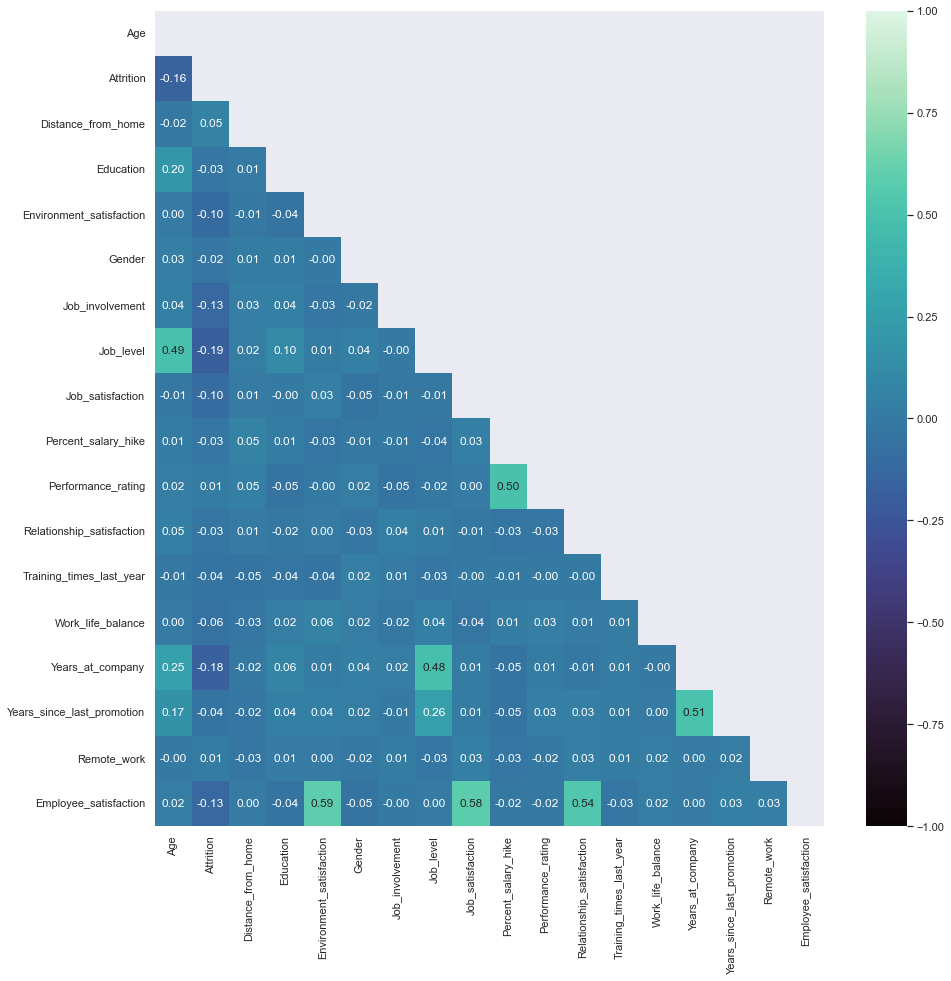

In [30]:
#Hacemos una grafica que tenga una correlación entre todas las columnas con valores numericas
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

Observaciones:

- En Employee_satisfaction se observan los valores más altos 0.59, 0.58 y 0.54 porque son las características que dieron lugar a dicha columna (es la media de las tres.), por tanto, no podemos considerar esa relación como relevante.

- Los niveles más altos de correlación serían aquellos de 0.48, 0.49, 0.50 y 0.51 pero, aún así, no son lo suficientemente altos como considerar que suponen una relación fuerte.

- Se aprecia que la gran mayoría de conjuntos tiene un nivel de correlación ínfimo, no implica casi relación alguna.

Conclusiones finales:

Tras todos los análisis de relaciones, se puede concluir firmemente que:

- No hay una relación fuerte entre el abandono por parte de los empleados y atributos individuales. 

- Las bajas se producen por un conjunto amplio y diverso de factores, sin predominar ninguno especialmente.

- Se podría decir que los empleados con una satisfacción general más baja son aquellos que se encuentran en la zona media de varias variables, como Age, Education o Work_life_balance.